<div style="background-color:#FFE4E1; padding:15px; border-radius:10px; border:1px solid #f3e5ab;">

# Sales Data Analysis – Superstore Dataset

### Objective
Analyze sales, profit, and quantity trends to identify key business insights.

### Dataset Info
- Source: Kaggle Superstore Dataset  
- File: `superstore.csv`  
- Tools: Python, Pandas, Matplotlib, Seaborn  


<div style="background-color:#FFF8E7; padding:15px; border-radius:10px; border:1px solid #f3e5ab;">

## OBJECTIVES (Questions to Answer)

In this analysis, we aim to answer the following key business questions:

1. **What are the total sales, profit, and quantity by region?**  
2. **Which product categories and sub-categories generate the most revenue?**  
3. **Which states or customers are the top performers?**  
4. **What are the monthly and quarterly trends in sales and profit?**  
5. **Which areas need improvement (e.g., low-profit or high-return products)?**


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [42]:
sns.set(style="whitegrid")

In [43]:
os.makedirs("visuals", exist_ok=True)

print("✅ Libraries imported and visuals folder ready!")

✅ Libraries imported and visuals folder ready!


In [44]:
import os
print(os.getcwd())

/Users/anushka/01_Sales_Analysis


In [45]:
data = pd.read_csv("/Users/anushka/Documents/Sales Analysis/Superstore.csv", encoding='latin1')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Exploring the Dataset ##

In [46]:
# See general info about the dataset
data.info()
# Get a statistical summary of numeric columns
data.describe()
# Check for missing values
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

<div style="background-color:#FFF8E7; padding:15px; border-radius:10px; border:1px solid #f3e5ab;">

# Superstore Sales Dataset – Summary

### Dataset Overview
- **Total Rows:** 9,994  
- **Total Columns:** 21  
- **No missing values**

### Key Numerical Columns
| Column     | Description                 |
|------------|-----------------------------|
| Sales      | Revenue from each order      |
| Profit     | Profit per order             |
| Quantity   | Number of items sold         |
| Discount   | Discount applied             |

### Key Categorical Columns
| Column         | Description                        |
|----------------|------------------------------------|
| Category       | Product category (e.g., Furniture, Technology) |
| Sub-Category   | Detailed product type               |
| Region         | Sales region (East, West, Central, South) |
| State, City    | Customer location                  |
| Segment        | Customer segment (Consumer, Corporate, Home Office) |
| Ship Mode      | Shipping method                     |
| Order Date     | Date of order placement             |
| Ship Date      | Date of shipment                    |

### Insights
- Dataset is **clean** and ready for analysis.  
- Covers **sales, profit, and customer info** across regions and categories.  
- Great for performing **KPIs, trend analysis, and visualizations**.


In [47]:
# Convert date columns to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

# Verify changes
data.dtypes[['Order Date', 'Ship Date']]


Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object

In [48]:
# Extract month and year from 'Order Date'
data['Month'] = data['Order Date'].dt.month
data['Year'] = data['Order Date'].dt.year

# Verify new columns
data[['Order Date', 'Month', 'Year']].head()


,Order Date,Month,Year
0,2016-11-08,11,2016
1,2016-11-08,11,2016
2,2016-06-12,6,2016
3,2015-10-11,10,2015
4,2015-10-11,10,2015


<div style="background-color:#FFF8E7; padding:15px; border-radius:10px; border:1px solid #f3e5ab;">

### Extract Month and Year from Order Date

In this step, we extract the **month** and **year** from the `Order Date` column to enable time-based analysis.  
This will help us later in visualizing trends, such as monthly or yearly sales performance.

**Explanation:**
- `dt.month` extracts the month (1–12) from each order date.  
- `dt.year` extracts the year (e.g., 2017, 2018, 2019).  
- These new columns make it easier to group and analyze data by time periods.


<div style="background-color:#FFF8E7; padding:15px; border-radius:10px; border:1px solid #f3e5ab;">

### Exploratory Data Analysis (EDA)

In this step, we explore the dataset to understand its structure, categories, and statistical patterns.

**Objectives:**
- Identify key variables and their distributions.
- Explore different product categories, regions, and shipping modes.
- Gain a quick overview of sales and profit ranges using summary statistics.


In [49]:
# Basic descriptive statistics
data.describe()

# Check unique values in key categorical columns
print("Unique Categories:")
print(data['Category'].unique())
print("\nUnique Regions:")
print(data['Region'].unique())
print("\nUnique Ship Modes:")
print(data['Ship Mode'].unique())


Unique Categories:
['Furniture' 'Office Supplies' 'Technology']

Unique Regions:
['South' 'West' 'Central' 'East']

Unique Ship Modes:
['Second Class' 'Standard Class' 'First Class' 'Same Day']


<div style="background-color:#FFF8E7; padding:15px; border-radius:10px; border:1px solid #f3e5ab;">

### Visualization – Sales, Profit, and Quantity by Region

Visualizations help us easily compare the performance of each region.  
The bar charts below show total **Sales**, **Profit**, and **Quantity** for each region, helping identify which areas are performing best overall.
Total Sales, Profit, and Quantity by Region

We begin our analysis by examining the overall performance of each region.  
By grouping the data by **Region**, we can identify which regions contribute the most to total sales and profit,  
and which have higher or lower sales quantities.


In [50]:
region_summary = data.groupby('Region')[['Sales', 'Profit', 'Quantity']].sum().sort_values('Sales', ascending=False)
print(region_summary)


               Sales       Profit  Quantity
Region                                     
West     725457.8245  108418.4489     12266
East     678781.2400   91522.7800     10618
Central  501239.8908   39706.3625      8780
South    391721.9050   46749.4303      6209


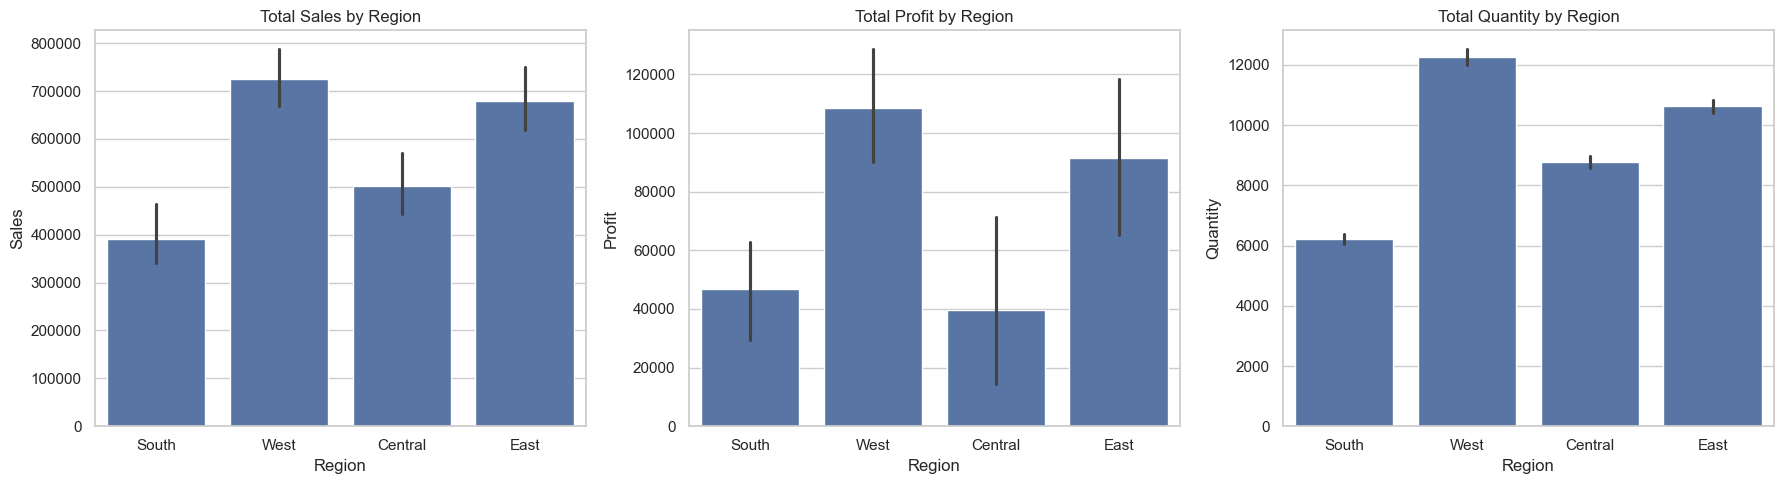

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Sales by Region
sns.barplot(x='Region', y='Sales', data=data, estimator=sum, ax=axes[0])
axes[0].set_title('Total Sales by Region')

# Profit by Region
sns.barplot(x='Region', y='Profit', data=data, estimator=sum, ax=axes[1])
axes[1].set_title('Total Profit by Region')

# Quantity by Region
sns.barplot(x='Region', y='Quantity', data=data, estimator=sum, ax=axes[2])
axes[2].set_title('Total Quantity by Region')

plt.tight_layout()
plt.show()


<div style="background-color:#FFF8E7; padding:15px; border-radius:10px; border:1px solid #f3e5ab;">

### Sales by Category and Sub-Category

In this step, we analyze which product categories and sub-categories contribute the most to overall revenue.  
This helps identify high-performing product lines and potential focus areas for sales and marketing efforts.


In [52]:
# Group by Category and Sub-Category
category_sales = data.groupby(['Category', 'Sub-Category'])['Sales'].sum().sort_values(ascending=False)
category_sales


Category         Sub-Category
Technology       Phones          330007.0540
Furniture        Chairs          328449.1030
Office Supplies  Storage         223843.6080
Furniture        Tables          206965.5320
Office Supplies  Binders         203412.7330
Technology       Machines        189238.6310
                 Accessories     167380.3180
                 Copiers         149528.0300
Furniture        Bookcases       114879.9963
Office Supplies  Appliances      107532.1610
Furniture        Furnishings      91705.1640
Office Supplies  Paper            78479.2060
                 Supplies         46673.5380
                 Art              27118.7920
                 Envelopes        16476.4020
                 Labels           12486.3120
                 Fasteners         3024.2800
Name: Sales, dtype: float64

<div style="background-color:#FFF8E7; padding:15px; border-radius:10px; border:1px solid #f3e5ab;">

### Visualize Sales by Category

This visualization highlights which main product categories generate the most total sales, helping identify the strongest performing segments.


/var/folders/6n/_gpc59l51ljgjflg4djxll7c0000gn/T/ipykernel_10517/1304720463.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_sales.index, y=cat_sales.values, palette='Blues_d')


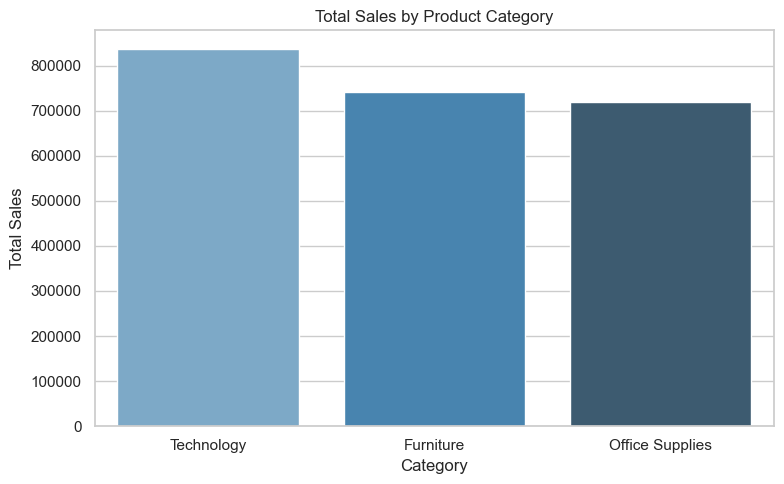

In [53]:
# Step 10: Visualize Sales by Category
import matplotlib.pyplot as plt
import seaborn as sns

cat_sales = data.groupby('Category')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=cat_sales.index, y=cat_sales.values, palette='Blues_d')
plt.title("Total Sales by Product Category")
plt.ylabel("Total Sales")
plt.xlabel("Category")
plt.tight_layout()
plt.show()


<div style="background-color:#FFF8E7; padding:15px; border-radius:10px; border:1px solid #f3e5ab;">

### Monthly Sales and Profit Trends

Here we analyze monthly performance to identify sales and profit fluctuations across the year.  
This helps reveal seasonality patterns and high-performing periods.


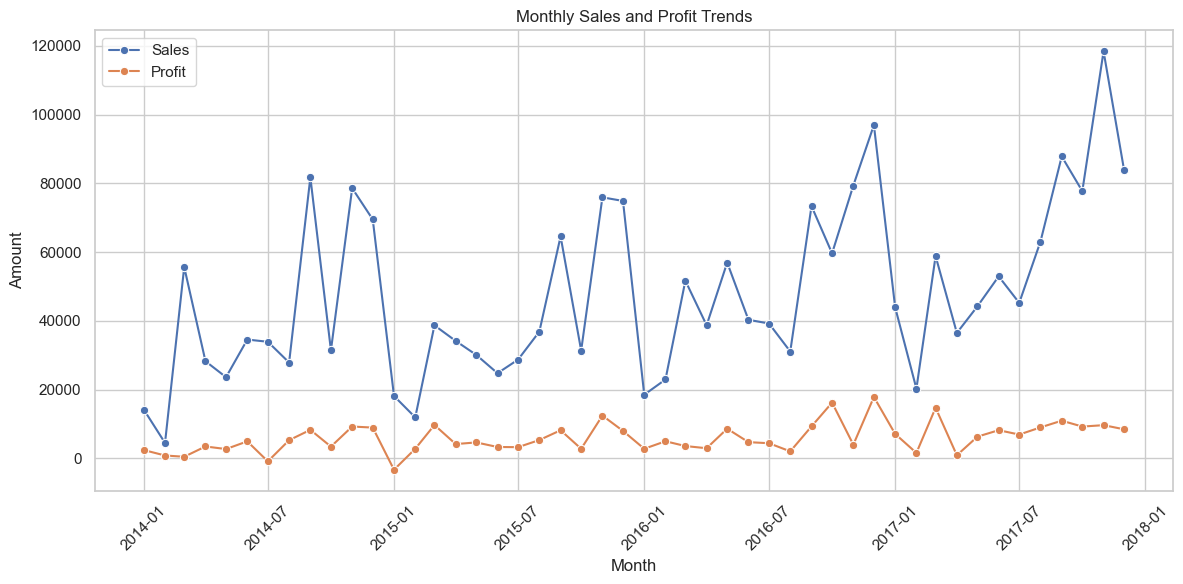

In [54]:
# Extract month and year from Order Date as datetime (not period)
data['Month'] = data['Order Date'].dt.to_period('M').dt.to_timestamp()

# Group by month
monthly_trends = data.groupby('Month')[['Sales', 'Profit']].sum().reset_index()

# Plot sales and profit trends over time
plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Sales', data=monthly_trends, marker='o', label='Sales')
sns.lineplot(x='Month', y='Profit', data=monthly_trends, marker='o', label='Profit')
plt.title("Monthly Sales and Profit Trends")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


<div style="background-color:#FFF8E7; padding:15px; border-radius:10px; border:1px solid #f3e5ab;">

### Identify Low-Profit and High-Return Products

This step highlights areas needing improvement:
- **Low-profit sub-categories** show which products have minimal profit margins.
- **High-return products** (if data available) indicate potential quality or satisfaction issues.

By focusing on these areas, the company can take data-driven actions to improve profitability and customer satisfaction.


In [55]:
# Calculate profit margin
data['Profit Margin'] = (data['Profit'] / data['Sales']) * 100

# Identify low-profit products
low_profit = data[data['Profit Margin'] < 5].groupby('Sub-Category').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Profit Margin': 'mean'
}).sort_values(by='Profit Margin', ascending=True)

# Identify products with high return rates (if 'Returned' column exists)
if 'Returned' in data.columns:
    high_return = data[data['Returned'] == 'Yes']['Sub-Category'].value_counts().head(10)
else:
    high_return = "No return data available."

print("Low Profit Sub-Categories:\n")
print(low_profit.head(10))
print("\nHigh Return Sub-Categories:\n")
print(high_return)


Low Profit Sub-Categories:

                    Sales      Profit  Profit Margin
Sub-Category                                        
Appliances      3382.5340  -8629.6412    -253.358209
Binders        36140.6130 -38510.4964    -107.811310
Machines       73674.2180 -30066.4697     -60.728778
Furnishings    15551.9000  -6463.1182     -53.853591
Bookcases      64324.7538 -11601.0886     -32.543111
Tables        121044.0790 -31998.2502     -27.431443
Phones         38562.4500  -7464.9061     -18.363313
Chairs        114012.1960  -9745.0327      -9.911187
Supplies       40678.1860  -2212.4813      -9.892857
Storage        78255.5760  -5634.7580      -8.461921

High Return Sub-Categories:

No return data available.


/var/folders/6n/_gpc59l51ljgjflg4djxll7c0000gn/T/ipykernel_10517/4121025575.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Sales', data=data, estimator='sum', ci=None)


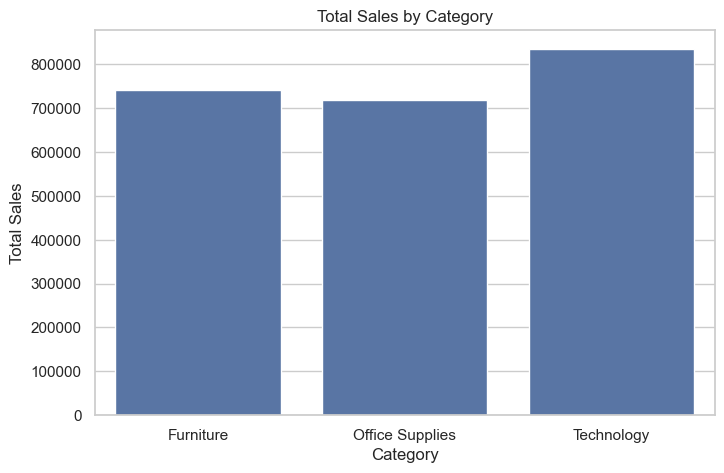

/var/folders/6n/_gpc59l51ljgjflg4djxll7c0000gn/T/ipykernel_10517/4121025575.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Profit', data=data, estimator='sum', ci=None, palette='Set2')
/var/folders/6n/_gpc59l51ljgjflg4djxll7c0000gn/T/ipykernel_10517/4121025575.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Profit', data=data, estimator='sum', ci=None, palette='Set2')


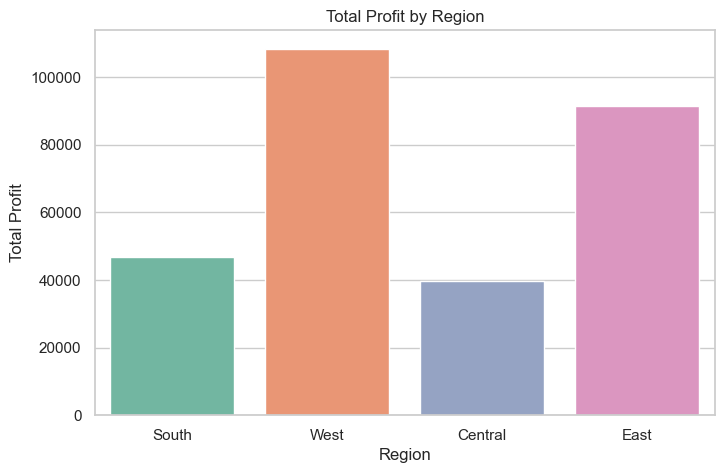

/var/folders/6n/_gpc59l51ljgjflg4djxll7c0000gn/T/ipykernel_10517/4121025575.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_subcat.index, y=top_subcat.values, palette='Set3')


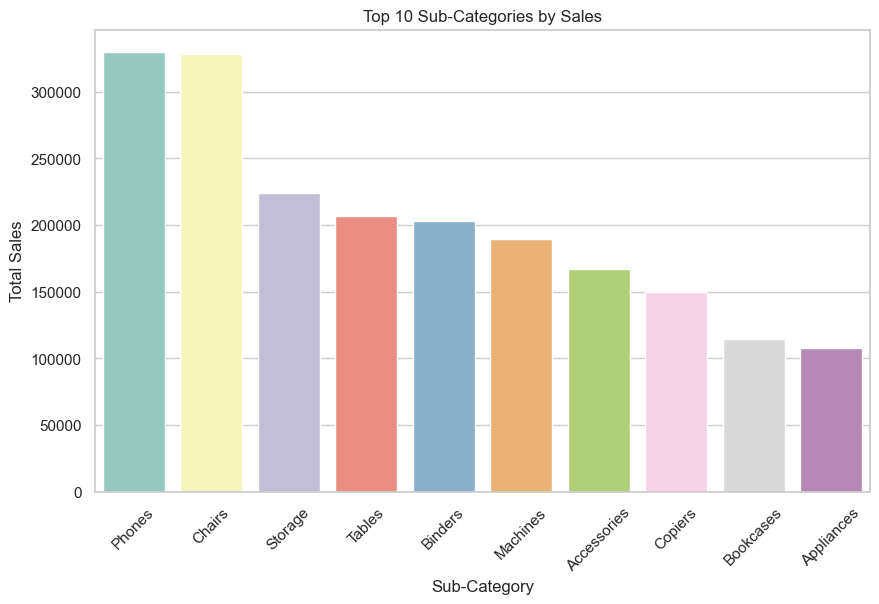

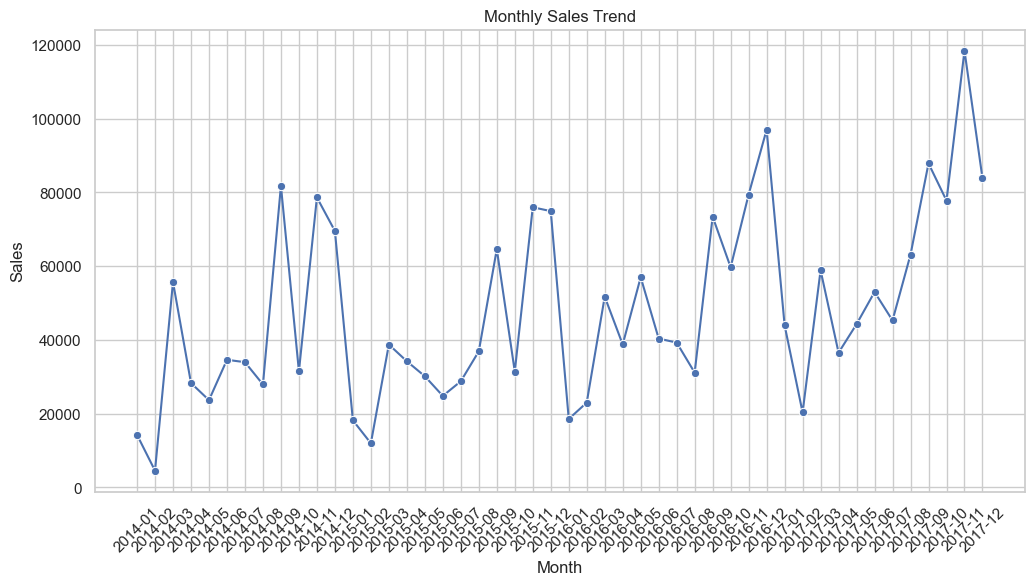

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Sales by Category
plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Sales', data=data, estimator='sum', ci=None)
plt.title('Total Sales by Category')
plt.ylabel('Total Sales')
plt.xlabel('Category')
plt.show()

# 2. Profit by Region
plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Profit', data=data, estimator='sum', ci=None, palette='Set2')
plt.title('Total Profit by Region')
plt.ylabel('Total Profit')
plt.xlabel('Region')
plt.show()

# 3. Top 10 Sub-Categories by Sales
top_subcat = data.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_subcat.index, y=top_subcat.values, palette='Set3')
plt.title('Top 10 Sub-Categories by Sales')
plt.ylabel('Total Sales')
plt.xlabel('Sub-Category')
plt.xticks(rotation=45)
plt.show()

# 4. Monthly Sales Trend
data['Month'] = data['Order Date'].dt.to_period('M').astype(str)
monthly_sales = data.groupby('Month')['Sales'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Sales', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.ylabel('Sales')
plt.xlabel('Month')
plt.show()


<div style="background-color:#FFE4E1; padding:15px; border-radius:10px; border:1px solid #f3e5ab;">

## Visual Summary & Dashboard

This section presents a quick visual overview of key business insights from the Superstore dataset.  
We explore sales, profit, and performance across different categories, regions, and time periods.

### 1. Total Sales by Category
- **Observation:** Technology generates the highest sales, followed by Office Supplies and Furniture.  
- **Insight:** Tech-related products are the main revenue driver for the business.

### 2. Total Profit by Region
- **Observation:** The **West region** shows the highest total profit.  
- **Insight:** The **South** and **Central** regions have room for improvement, possibly due to lower demand or higher discounts.

### 3. Top 10 Sub-Categories by Sales
- **Observation:** Products like **Phones**, **Chairs**, and **Storage** dominate sales.  
- **Insight:** These categories could be the focus for future promotions and marketing campaigns.

### 4. Monthly Sales Trend
- **Observation:** Sales show a steady rise toward year-end, peaking around **November–December**.  
- **Insight:** Strong **seasonal patterns** suggest opportunities for targeted holiday campaigns.
